In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.stats import ttest_ind
from sklearn.preprocessing import Imputer

In [5]:
data = pd.read_csv("cleaned_data_not_imputed.csv")

In [6]:
data.columns.values

array(['tax_value', 'property_size', 'zestimate_amount', 'bathrooms',
       'tax_year', 'latitude', 'bedrooms', 'year_built', 'home_size',
       'longitude', 'schools_Number Tested', 'schools_Mean ELA Score',
       'schools_Mean Math Score', 'schools_mean score',
       'ADMINISTRATIVE CODE_last_3_years',
       'ADMINISTRATIVE CODE_percent_change',
       'AGGRAVATED HARASSMENT 2_last_3_years',
       'AGGRAVATED HARASSMENT 2_percent_change', 'ARSON_last_3_years',
       'ARSON_percent_change',
       'ASSAULT 3 AND RELATED OFFENSES_last_3_years',
       'ASSAULT 3 AND RELATED OFFENSES_percent_change',
       'BURGLARY_last_3_years', 'BURGLARY_percent_change',
       'CRIMINAL TRESPASS_last_3_years',
       'CRIMINAL TRESPASS_percent_change',
       'FEL. CRIMINAL MISCHIEF & RELATED OFFENSES_last_3_years',
       'FEL. CRIMINAL MISCHIEF & RELATED OFFENSES_percent_change',
       'FELONY ASSAULT_last_3_years', 'FELONY ASSAULT_percent_change',
       'FELONY DANGEROUS DRUGS_last_3_ye

In [7]:
data.head()

,tax_value,property_size,zestimate_amount,bathrooms,tax_year,latitude,bedrooms,year_built,home_size,longitude,...,neighborhood_South Bronx,neighborhood_Sunny Side,neighborhood_Tremont,neighborhood_Tribeca,neighborhood_Upper East Side,neighborhood_Upper West Side,neighborhood_Washington Heights,neighborhood_West Village,neighborhood_Williamsburg,neighborhood_Yorkville
0,NaN,NaN,849427.0,1.0,NaN,40.724448,1.0,NaN,400.0,-73.980284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1674000.0,2250.0,7332356.0,1.0,2015.0,40.724385,2.0,1900.0,10800.0,-73.980120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,1991289.0,1.0,NaN,40.724332,4.0,NaN,NaN,-73.980007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2837000.0,650.0,1225236.0,1.0,2015.0,40.724225,1.0,1876.0,650.0,-73.979720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6701000.0,2250.0,12785150.0,NaN,2015.0,40.724125,NaN,1901.0,4168.0,-73.979495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
correlated_predictors = []

for column in data.columns.values:
    if len(data[column].unique()) == 2:
        new_data = data[np.isfinite(data[column])]
        data0 = new_data[new_data[column]==0]['zestimate_amount']
        data1 = new_data[new_data[column]==1]['zestimate_amount']
        pval = ttest_ind(data0, data1)[1]
        if pval < 0.05:
            correlated_predictors += [column]
    else:
        new_data = data[np.isfinite(data[column])]
        corr = np.corrcoef(new_data[column], new_data['zestimate_amount'])[0,1]
        if np.abs(corr) > 0.1:
            correlated_predictors += [column]
    #print "Correlation between " + column + " and zestime_amount: " + str(corr)

/Users/marinaadario/marinaadario/anaconda3/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


In [9]:
len(correlated_predictors)

72

In [10]:
correlated_predictors

['tax_value',
 'zestimate_amount',
 'bathrooms',
 'latitude',
 'bedrooms',
 'home_size',
 'schools_Number Tested',
 'schools_Mean ELA Score',
 'schools_Mean Math Score',
 'schools_mean score',
 'ADMINISTRATIVE CODE_last_3_years',
 'ASSAULT 3 AND RELATED OFFENSES_last_3_years',
 'BURGLARY_last_3_years',
 'CRIMINAL TRESPASS_last_3_years',
 'FELONY ASSAULT_last_3_years',
 'FELONY DANGEROUS DRUGS_last_3_years',
 'FELONY DANGEROUS WEAPONS_last_3_years',
 'FORGERY_THEFT-FRAUD_IDENTITY THEFT_last_3_years',
 'FRAUDS_percent_change',
 'GRAND LARCENY OF MOTOR VEHICLE_last_3_years',
 'GRAND LARCENY_last_3_years',
 'INTOXICATED & IMPAIRED DRIVING_last_3_years',
 'INTOXICATED & IMPAIRED DRIVING_percent_change',
 'MISD. CRIMINAL MISCHIEF & RELATED OFFENSES_last_3_years',
 'MISD. CRIMINAL MISCHIEF & RELATED OFFENSES_percent_change',
 'MISDEMEANOR DANGEROUS DRUGS_last_3_years',
 'MISDEMEANOR DANGEROUS WEAPONS_last_3_years',
 'MISDEMEANOR SEX CRIMES_percent_change',
 'MURDER & NON NEGL. MANSLAUGHTER_la

In [11]:
data_only_correlated_predictors = data[correlated_predictors]

In [12]:
for i in range(len(correlated_predictors)):
    if i+1 < len(correlated_predictors) and i != 1:
        for j in range(i, len(correlated_predictors)):
            if i != j and j !=1:
                column1 = correlated_predictors[i]
                column2 = correlated_predictors[j]
                new_data = data[np.isfinite(data[column1])]
                new_data = new_data[np.isfinite(new_data[column2])]

                corr = np.corrcoef(new_data[column1], new_data[column2])
                if corr[0,1] > .8:
                    print str(round(corr[0,1], 4)) + "\t"+column1 + ", " + column2 

0.8285	schools_Number Tested, schools_Mean Math Score
0.8093	schools_Number Tested, schools_mean score
0.9942	schools_Mean ELA Score, schools_Mean Math Score
0.9983	schools_Mean ELA Score, schools_mean score
0.9988	schools_Mean Math Score, schools_mean score
0.931	ASSAULT 3 AND RELATED OFFENSES_last_3_years, FELONY ASSAULT_last_3_years
0.8699	ASSAULT 3 AND RELATED OFFENSES_last_3_years, FELONY DANGEROUS WEAPONS_last_3_years
0.8323	ASSAULT 3 AND RELATED OFFENSES_last_3_years, MURDER & NON NEGL. MANSLAUGHTER_last_3_years
0.883	ASSAULT 3 AND RELATED OFFENSES_last_3_years, OFFENSES AGAINST PUBLIC ADMINISTRATION_last_3_years
0.864	ASSAULT 3 AND RELATED OFFENSES_last_3_years, OTHER FELONIES_last_3_years
0.8793	ASSAULT 3 AND RELATED OFFENSES_last_3_years, RAPE_last_3_years
0.9137	ASSAULT 3 AND RELATED OFFENSES_last_3_years, ROBBERY_last_3_years
0.8245	ASSAULT 3 AND RELATED OFFENSES_last_3_years, TOTAL NON-SEVEN MAJOR FELONY OFFENSES_last_3_years
0.8658	BURGLARY_last_3_years, FORGERY_THEFT-FRA

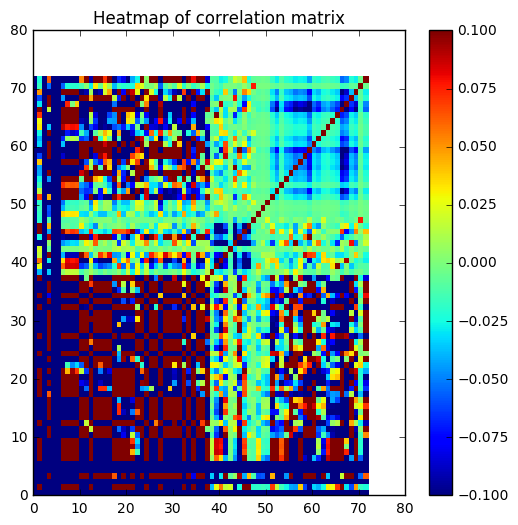

In [23]:
# Compute matrix of correlation coefficients
corr_matrix = np.corrcoef(data[correlated_predictors].T)
# Display heat map 
plt.subplots(1, 1, figsize=(6, 6))

plt.pcolor(corr_matrix)

plt.title('Heatmap of correlation matrix')
plt.colorbar()

plt.show()

In [24]:
corr_matrix

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,  1.        ,         nan, ...,  0.04975293,
        -0.01784723, -0.02300516],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ..., 
       [        nan,  0.04975293,         nan, ...,  1.        ,
        -0.00833893, -0.02780456],
       [        nan, -0.01784723,         nan, ..., -0.00833893,
         1.        , -0.00461519],
       [        nan, -0.02300516,         nan, ..., -0.02780456,
        -0.00461519,  1.        ]])

In [14]:
crimes = ['MURDER & NON NEGL. MANSLAUGHTER_last_3_years', 'RAPE_last_3_years',\
 'ROBBERY_last_3_years', 'TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years']

In [15]:
for i in range(len(crimes)):
    if i+1 < len(crimes):
        for j in range(i, len(crimes)):
            if i != j:
                column1 = crimes[i]
                column2 = crimes[j]
                new_data = data[np.isfinite(data[column1])]
                new_data = new_data[np.isfinite(new_data[column2])]

                corr = np.corrcoef(new_data[column1], new_data[column2])
                print str(round(corr[0,1], 4)) + "\t"+column1 + ", " + column2 

0.8215	MURDER & NON NEGL. MANSLAUGHTER_last_3_years, RAPE_last_3_years
0.8474	MURDER & NON NEGL. MANSLAUGHTER_last_3_years, ROBBERY_last_3_years
-0.3885	MURDER & NON NEGL. MANSLAUGHTER_last_3_years, TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years
0.8502	RAPE_last_3_years, ROBBERY_last_3_years
-0.2169	RAPE_last_3_years, TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years
-0.1957	ROBBERY_last_3_years, TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years


In [16]:
final_predictors = ['tax_value','zestimate_amount','bathrooms', 'latitude', 'bedrooms','home_size',\
                    'MURDER & NON NEGL. MANSLAUGHTER_last_3_years', 'RAPE_last_3_years',\
                    'ROBBERY_last_3_years', 'TOTAL SEVEN MAJOR FELONY OFFENSES_last_3_years',\
                    'schools_Number Tested', 'schools_mean score', 'home_type_Apartment','home_type_Condominium',\
                    'home_type_Cooperative','home_type_Duplex','home_type_Miscellaneous','home_type_MultiFamily2To4',\
                    'home_type_Quadruplex','home_type_SingleFamily','home_type_Townhouse','home_type_Unknown',\
                    'neighborhood_Battery Park','neighborhood_Bedford-Stuyvesant','neighborhood_Borough Park',\
                    'neighborhood_Carnegie Hill','neighborhood_Chelsea','neighborhood_Chinatown',\
                    'neighborhood_Clinton','neighborhood_East Harlem','neighborhood_East Village',\
                    'neighborhood_Greenwich Village','neighborhood_Hamilton Heights','neighborhood_Harlem',\
                    'neighborhood_Inwood','neighborhood_Lower East Side','neighborhood_Morningside Heights',\
                    'neighborhood_North Sutton Area','neighborhood_Soho','neighborhood_Tribeca',\
                    'neighborhood_Upper East Side','neighborhood_Upper West Side','neighborhood_Washington Heights',\
                    'neighborhood_West Village','neighborhood_Williamsburg','neighborhood_Yorkville']

In [ ]:
data = data[final_predictors]

### NAs

In [172]:
data = data[np.isfinite(data['bedrooms'])]
data = data[np.isfinite(data['bathrooms'])]

In [173]:
column_names = data.columns.values

In [174]:
imputer_data = Imputer(strategy = "median")
imputer_data.fit(data)
data = imputer_data.transform(data)

In [176]:
data = pd.DataFrame(data, columns = column_names)

In [177]:
len(data)

12963

### Split into train and test

In [178]:
test = data.sample(n=2500)
train = data.drop(test.index)

In [179]:
test.to_csv("test_best_features.csv", index = False)
train.to_csv("train_best_features.csv", index = False)